Bootstraping(use of resample data to perform statistical inference)

Have a sample of data(n)

choose n of them with replacement for each sample(bootstrap sample)

bootstrap replicate: value of the summary statistic computed by the bootstrap sample

Get a large number of summary statistics from the resampled datasets

plot a ECDF(to view the prob distribution describing the summary statistic)


In [2]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
light_df = pd.read_csv('../../data/morley.csv')
light_df.drop("Unnamed: 0",axis=1,inplace=True)
light_df.head()

,Expt,Run,Speed
0,1,1,850
1,1,2,740
2,1,3,900
3,1,4,1070
4,1,5,930


In [15]:
light_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Expt     100 non-null int64
Run      100 non-null int64
Speed    100 non-null int64
dtypes: int64(3)
memory usage: 2.4 KB


### Computing a bootstrap replicate(A single value of a statistic computed from a bootstrap sample)

In [24]:
import numpy as np
np.random.choice([1,2,3,4,5], size=5, replace=True)

array([3, 1, 4, 4, 4])

In [32]:
# draw a bootstrap sample
bs_sample = np.random.choice(light_df['Speed'],size=100,replace=True)

# pick a summary statistic to create bootstrap replicates

print(f"mean:{np.mean(bs_sample)}")
print(f"median:{np.median(bs_sample)}")
print(f"std dev:{np.std(bs_sample)}")

mean:846.8
median:850.0
std dev:80.67068860496977


In [30]:
bs_sample

array([ 890,  800, 1000,  950,  960,  810,  960,  850,  880,  980,  840,
        800,  850,  860,  800,  950,  880,  910,  890,  840,  840,  880,
        810,  840,  750,  960,  840,  950,  850,  850,  970,  880,  950,
        800,  850,  780,  720,  930,  720,  770,  880,  960,  760,  850,
        850,  760,  620,  810,  840,  840, 1000,  720,  810,  720,  840,
        800,  840,  760,  840,  930,  840,  910,  880,  740,  930,  870,
        880, 1000,  900,  720,  850,  940,  810,  620,  880,  950,  790,
        880,  870,  760,  810,  800,  810,  810,  870, 1000,  810,  960,
        740,  810,  840,  880,  720,  920,  720,  780,  870,  830,  760,
        750])

In [34]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

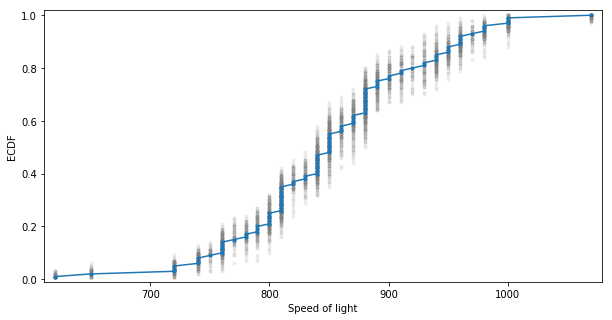

In [50]:
plt.figure(figsize=(10,5))
for _ in range(50):

    # generate a bootstrap sample
    bs_sample = np.random.choice(
        light_df['Speed'], size=len(light_df['Speed']), replace=True)

    # compute and plot the ECDF(emperical cumulative distribution function) from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray',alpha=0.1)
    
x, y = ecdf(light_df['Speed'])
_ = plt.plot(x, y, marker='.')


# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Speed of light')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Computing confidence interval

In [56]:
# create a function to generate a bootstrap replicate
def bootstrap_replicate_1d(data,func):
    '''generate bootstrap replicate of 1D data'''
    bs_sample = np.random.choice(data,len(data),replace=True)
    return func(bs_sample)

In [61]:
bootstrap_replicate_1d(light_df['Speed'],np.mean)

854.10000000000002

In [62]:
# initialize an empty array to store the replicates
bs_replicates = np.empty(10000)

# generate 10k bootstrap samples and replicates and compute mean for each sample
for i in range(10000): 
    bs_replicates[i] = bootstrap_replicate_1d(light_df['Speed'],np.mean)

In [63]:
bs_replicates

array([ 841.2,  840.1,  872.2, ...,  853. ,  838.3,  855.9])

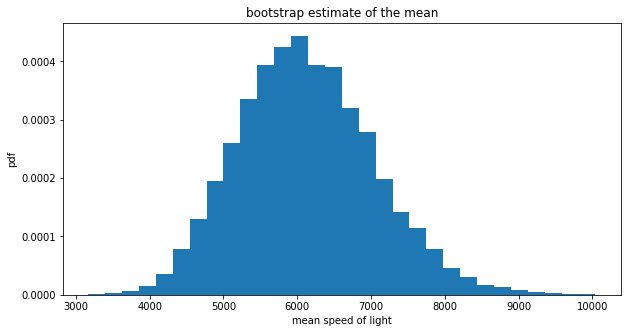

In [156]:
# draw a histogram for the bs_replicates
plt.figure(figsize=(10,5))
_ = plt.hist(bs_replicates,normed=True,bins=30) 
# normed=True the integral of the histogram will sum to 1
_ = plt.xlabel('mean speed of light')
_ = plt.ylabel('pdf')
_ = plt.title('bootstrap estimate of the mean')
plt.show()

Definition for confidence interval of a statistic

if we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.

In [73]:
conf_int = np.percentile(bs_replicates,[2.5,97.5])

In [74]:
conf_int

array([ 837. ,  868.1])

In [75]:
# create a function to generate a bootstrap replicate
def bootstrap_replicate_1d(data,func):
    '''generate bootstrap replicate of 1D data'''
    bs_sample = np.random.choice(data,len(data),replace=True)
    return func(bs_sample)

def draw_bs_replicates(data,func,size=1):
    '''draw bs replicates'''
    bs_replicate = np.empty(size)
    for i in range(size):
        
        bs_replicate[i] = bootstrap_replicate_1d(data,func)
        
    return bs_replicate

In [78]:
draw_bs_replicates(light_df["Speed"],np.mean,size=10000)

array([ 861.4,  862.9,  862.4, ...,  847.3,  858.7,  853.7])

### Calculate the SEM using the bootstrap replicates

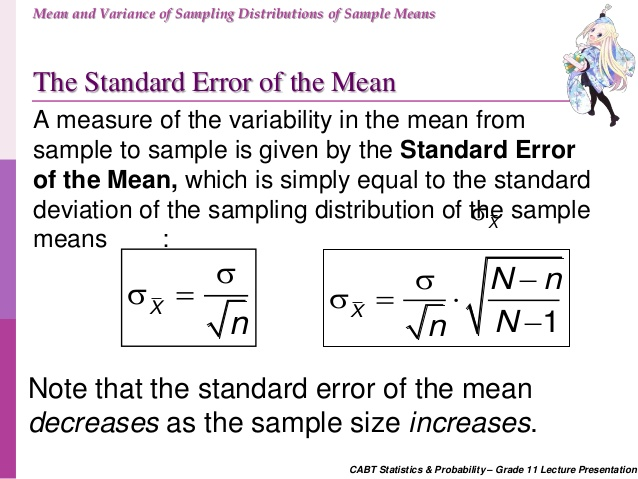

In [95]:
from IPython.display import Image
Image('../images/sem.jpg')

In [101]:
# standard error the mean using hacker statistics

# take 10000 bootstrap replicates of the mean:
bs_replicates = draw_bs_replicates(light_df['Speed'], np.mean, size=10000)

# compute and print std deviation of the bs_replicates
bs_std = np.std(bs_replicates)
print(f"bootstrap sem: {bs_std}")

conf_int = np.percentile(bs_replicates,[2.5,97.5])
#compute the 95% confidence interval, that is to provided the 2.5th and 97.5th value of the bootstrap replicates
print(f"conf_int:{conf_int}")

# theoritcal SEM
sem = np.std(light_df['Speed'])/np.sqrt(len(light_df))
print(f"theorical sem: {sem}")

bootstrap sem: 7.843699456251495
conf_int:[ 837.0975  867.9   ]
theorical sem: 7.861450247886841


### Bootstrap replicates of other other statistics( as hackers, we can always take bootstrap replicates)

In [102]:
bs_replicates = draw_bs_replicates(light_df['Speed'],np.var,size=10000)

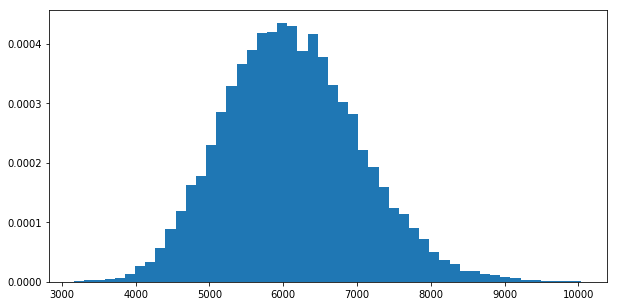

In [157]:
plt.figure(figsize=(10,5))
_ = plt.hist(bs_replicates,bins=50,normed=True)
plt.show()

#### Important

This is nonparametric inferernce: make no assumption about the model or prob distribution underlying the data.
But in linear regression we were using a linear model(two parameters:slope and intercept). This is parametric inference. 

### Pairs bootstrap(for linear regression)

resample data in pairs  
compute slope and intercept for the bootstrap sample to get the bootstrap replicate  
compute confidence intervals from many bootstrap replicates of the slope and intercept

In [112]:
array = np.arange(10)
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
bs_sample = np.random.choice(array,replace=True,size=len(array))
bs_sample

array([1, 5, 5, 6, 5, 0, 1, 6, 8, 2])

In [137]:
def draw_bs_pairs(x, y, size=1):
    '''perform pairs bootstrap for linear regression'''
    # set up an array of indicies to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # generate replicates
    for i in range(size):
        bs_ind = np.random.choice(inds, replace=True, size=len(inds))
        bs_x, bs_y = x[bs_ind], y[bs_ind]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        
    return bs_slope_reps, bs_intercept_reps

In [138]:
# import the literacy/fertility data
filepath = 'https://assets.datacamp.com/production/course_1550/datasets/female_literacy_fertility.csv'
fertility_df = pd.read_csv(filepath)
# rename column
fertility_df = fertility_df.rename(index=str, columns = {'female literacy':'female_literacy'})

#fertility
fertility = fertility_df.fertility.values

#illiteracy
illiteracy = 100-fertility_df.female_literacy

In [139]:
bs_slope_reps , bs_intercept_reps = draw_bs_pairs(illiteracy,fertility,size=10000)

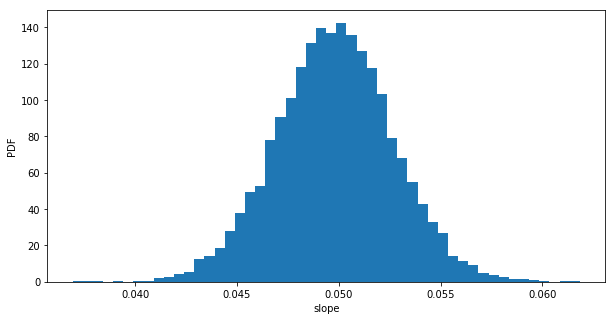

In [158]:
# Plot the histogram
plt.figure(figsize=(10,5))
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

In [161]:
# calculate the 95% CI for the slope
np.percentile(bs_slope_reps,[2.5,97.5])

array([ 0.04410122,  0.05539305])

if we repeated measurment, we would get the slope 95% of the time between 0.044 and 0.55

### Plotting bootstrap regressions

In [163]:
# generate x-values for bootstrap 
x = np.array([0,100])

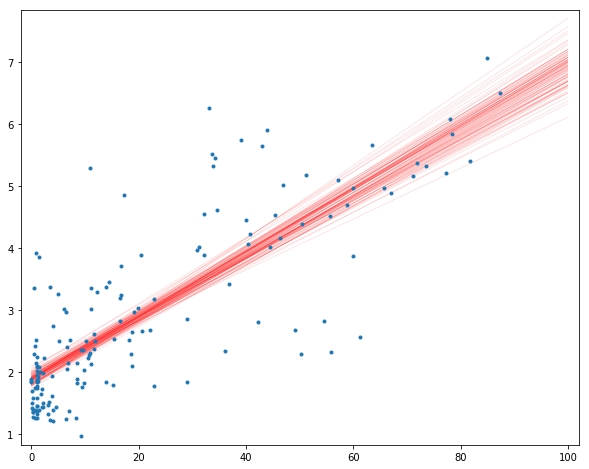

In [176]:
plt.figure(figsize=(10, 8))
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x+bs_intercept_reps[i],
                 color='red', alpha=0.2, linewidth=0.5)
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.show()